In [1]:
!rm -rf Eunomia
!git clone https://github.com/ouaguenouni/Eunomia

Cloning into 'Eunomia'...
remote: Enumerating objects: 97, done.
remote: Counting objects: 100% (97/97), done.
remote: Compressing objects: 100% (71/71), done.
remote: Total 97 (delta 47), reused 72 (delta 22), pack-reused 0
Receiving objects: 100% (97/97), 57.05 KiB | 679.00 KiB/s, done.
Resolving deltas: 100% (47/47), done.


In [2]:
!pip install -r Eunomia/requirements.txt

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from Eunomia.preferences import *
from Eunomia.additive_functions import *
from Eunomia.alternatives import *
from Eunomia.sampling import *
from Eunomia.mcmc import *
from Eunomia.degree import *
from Eunomia.experiments import *
pyro.set_rng_seed(1)

In [4]:
alt_df = pd.read_csv("Eunomia/data/alternatives0.csv")
alternatives = alt_df.values
r_df = pd.read_csv("Eunomia/data/rank0.csv")
ranks = r_df.columns.values

In [5]:
n = alternatives.shape[0]
theta = generate_additive_theta(alternatives.shape[0],2)
preferences = PreferenceModel(alternatives, ranks)
data = preferences.generate_preference_matrix(theta)
data = torch.tensor(data).float()
data[0:2]

tensor([[ 0.,  0.,  0.,  0.,  1., -1., -1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  1., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 1.,  1.,  0.,  0.,  0., -1., -1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [6]:
model = posterior_sampling_model(data, sigma_w = 1e-1, sigma_p = 10)
weights, sigmas = sample_model(model, data , "w", "sigma", warmup_steps = 200, num_samples = 800)

Sample: 100%|████████████████████████████| 1000/1000 [02:57,  5.65it/s, step size=5.56e-02, acc. prob=0.864]


In [8]:
sv = compute_semivalues(n, theta, weights.numpy().mean(axis = 0), lambda x:1)

In [9]:
sv.argsort()

array([6, 9, 2, 4, 7, 8, 5, 3, 0, 1])

(array([  1.,   6.,  18.,   0.,  26.,  90.,   0., 155., 268., 236.]),
 array([0.84444445, 0.86      , 0.8755556 , 0.89111114, 0.9066667 ,
        0.92222226, 0.93777776, 0.9533333 , 0.9688889 , 0.98444444,
        1.        ], dtype=float32),
 <BarContainer object of 10 artists>)

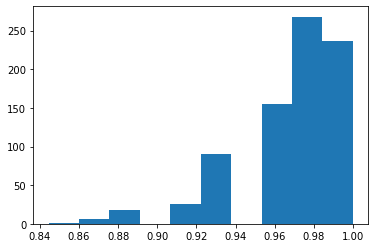

In [10]:
accs2 = get_acc_distribution(data, weights, sigmas)
plt.hist(accs2)